In [6]:
import pandas as pd

# Load the uploaded file to preview the data
file_path = 'C:/2019.csv'
data = pd.read_csv(file_path)
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### groupby를 사용한 데이터 그룹화

In [12]:
# GDP per capita를 사분위로 나눔
data['GDP Quartile'] = pd.qcut(data['GDP per capita'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Groupby를 통해 각 GDP 사분위에 대해 통계 계산
grouped_data = data.groupby('GDP Quartile', observed=False)

# 평균, 중앙값, 표준 편차 계산
mean_values = grouped_data['Score'].mean()
median_values = grouped_data['Score'].median()
std_values = grouped_data['Score'].std()

# 결과를 데이터프레임으로 정리
statistics_df = pd.DataFrame({
    'Mean Happiness Score': mean_values,
    'Median Happiness Score': median_values,
    'Standard Deviation': std_values
})

# 통계 데이터 표시
print(statistics_df)



              Mean Happiness Score  Median Happiness Score  Standard Deviation
GDP Quartile                                                                  
Low                       4.209179                  4.3740            0.626201
Medium                    5.122900                  5.1285            0.711980
High                      5.604211                  5.5640            0.670870
Very High                 6.704436                  6.8250            0.615902


 ### matplotlib을 사용한 그래프

 1. 평균 행복 지수 막대 그래프

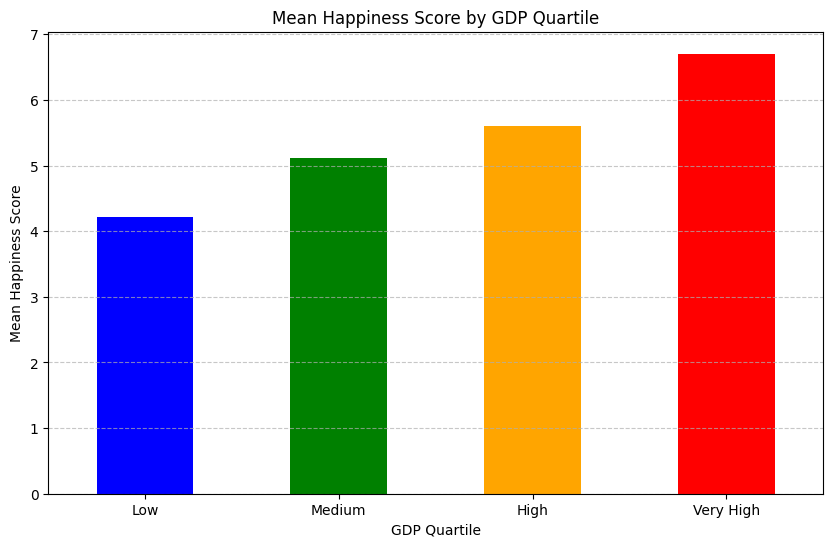

In [8]:
import matplotlib.pyplot as plt

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Mean Happiness Score by GDP Quartile')
plt.ylabel('Mean Happiness Score')
plt.xlabel('GDP Quartile')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2. 국가별 GDP 수준에 따른 행복 지수 산점도

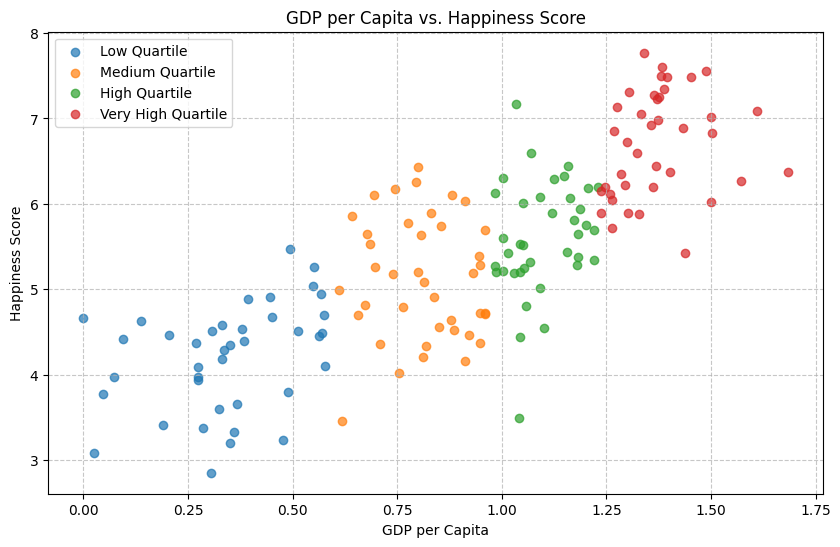

In [13]:
# 산점도 생성
plt.figure(figsize=(10, 6))
for quartile, group in data.groupby('GDP Quartile', observed=False):
    plt.scatter(group['GDP per capita'], group['Score'], label=f'{quartile} Quartile', alpha=0.7)

plt.title('GDP per Capita vs. Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()


### 머신 러닝 모델

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 특징(feature)과 타겟 변수(target) 정의
features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
X = data[features]
y = data['Score']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 결과 출력
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Squared Error (MSE): 0.4145
Mean Absolute Error (MAE): 0.4955


### 모델 평가

* MSE : 0.4145
* MAE : 0.4955